In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import  utils
from utilities import data_management_utils as data_utils
import itertools
from sklearn.metrics import auc
%matplotlib inline

In [2]:
root_path = './'
accuracies_path = root_path + 'Accuracies/'
index_file_path = './data/ZusammenfassungMinerale.xlsx'
models = ['DNN_0', 'DNN_1', 'DNN_3', 'DNN_5']
model_names = {0: 'DNN - 0',
              1: 'DNN - 1',
              2: 'DNN - 3',
              3: 'DNN - 5'}
pooling_names = {'average': 'Average Pooling',
                 'max': 'Max Pooling',
                 'dnn': 'Softmax Layer Pooling',
                 'dnn_split': 'Softmax Layer Pooling (2 outputs)',
                 'major_vote': 'Major Vote',
                 'standard': 'No Pooling'}
n_models = len(models)
cv_len = 217

real_data_id = np.load('./data/complete_data/data_id.npy')
rock_labels = np.sort(np.unique(real_data_id[:, 0]))
mineral_group_labels = np.sort(np.unique(data_utils.mineral_to_mineral_group(rock_labels, index_file_path)))

In [3]:
results = np.zeros(shape=(7, cv_len, n_models))

for i, model in enumerate(models):
    array_standard_shot = np.load(accuracies_path + model + '_shot_standard_cv.npy')
    array_MP_average = np.load(accuracies_path + model + '_MP_average_cv.npy')
    array_MP_max = np.load(accuracies_path + model + '_MP_max_cv.npy')
    array_MP_dnn = np.load(accuracies_path + model + '_MP_dnn_cv.npy')
    array_MP_dnn_split = np.load(accuracies_path + model + '_MP_dnn_split_cv.npy')
    array_major_vote_shot = np.load(accuracies_path + model + '_shot_major_vote_cv.npy')
    array_central_grid = np.load(accuracies_path + model + '_central_grid_average_cv.npy')
    
    
    results[0,:, i] = array_standard_shot
    results[1,:, i] = array_MP_average
    results[2,:, i] = array_MP_max
    results[3,:, i] = array_MP_dnn
    results[4,:, i] = array_MP_dnn_split
    results[5,:, i] = array_major_vote_shot
    results[6,:, i] = array_central_grid
    
np.save(accuracies_path + 'overall_results.npy', results)

In [4]:
results = np.load(accuracies_path + 'overall_results.npy')

## Model Performance

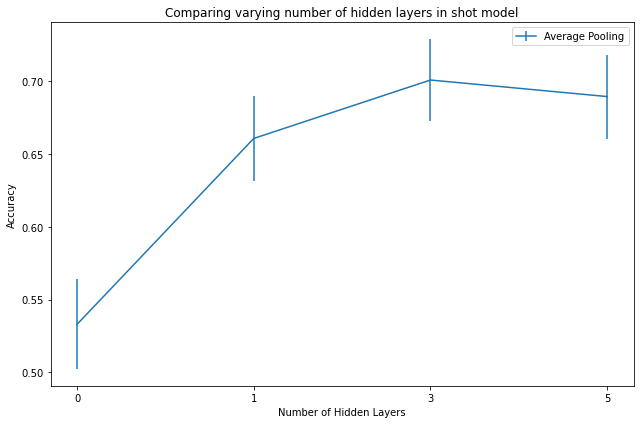

In [5]:
standard_errors = np.std(results, axis=1)/ np.sqrt(cv_len)
mean_accs = np.mean(results, axis=1)

plt.figure(figsize=(9,6))
x_labels = ['0', '1', '3', '5',]

#plt.errorbar(x=labels, y=mean_accs[0], yerr=standard_errors[0], label='Standard Single Shot')
plt.errorbar(x=x_labels, y=mean_accs[1], yerr=standard_errors[1], label='Average Pooling')
#plt.errorbar(x=labels, y=mean_accs[2], yerr=standard_errors[2], label='Max Pooling')
#plt.errorbar(x=labels, y=mean_accs[3], yerr=standard_errors[3], label='Softmax Layer Pooling')
#plt.errorbar(x=labels, y=mean_accs[4], yerr=standard_errors[4], label='Softmax Layer Pooling (2 outputs)')
#plt.errorbar(x=labels, y=mean_accs[5], yerr=standard_errors[5], label='Major Vote')
#plt.errorbar(x=labels, y=mean_accs[6], yerr=standard_errors[6], label='Central Grid')

plt.ylabel('Accuracy')
plt.xlabel('Number of Hidden Layers')
plt.title('Comparing varying number of hidden layers in shot model')
plt.legend()
plt.tight_layout()

image_filename = 'model_architecture_performance.png'
plt.savefig('Plots/' + image_filename, dpi=500)

plt.show()

## Pooling Performance

(7, 4) (7, 4)
(7,) (7,)


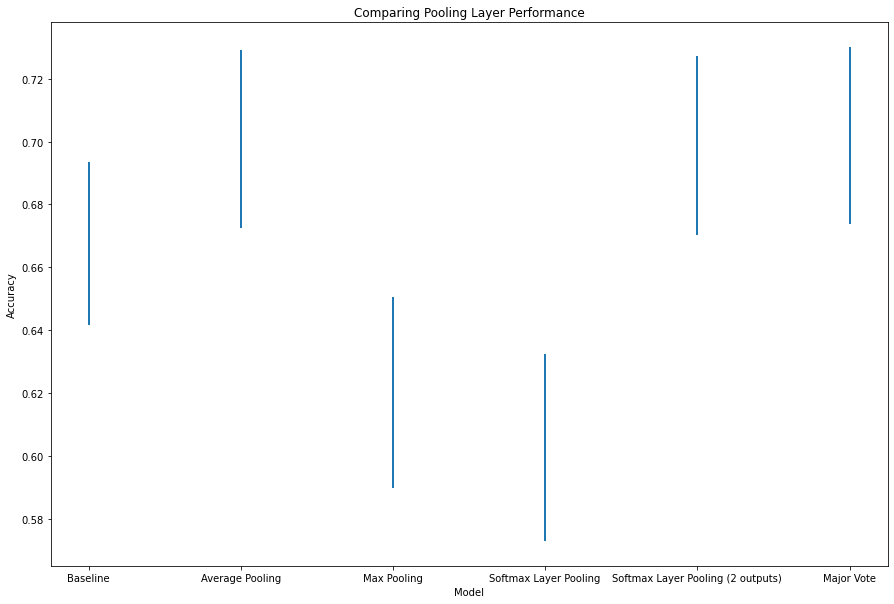

In [6]:
standard_errors = np.std(results, axis=1)/ np.sqrt(cv_len)
mean_accs = np.mean(results, axis=1)

plt.figure(figsize=(15,10))
labels = ['Baseline',
          'Average Pooling',
          'Max Pooling',
          'Softmax Layer Pooling',
          'Softmax Layer Pooling (2 outputs)',
          'Major Vote']

print(mean_accs.shape, standard_errors.shape)
print(mean_accs[:, 2].shape, standard_errors[:, 2].shape)

plt.errorbar(x=labels, y=mean_accs[:-1, 2], yerr=standard_errors[:-1, 2], linewidth=0, elinewidth=2)


plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Comparing Pooling Layer Performance')

image_filename = 'pooling_performance.png'
plt.savefig('Plots/' + image_filename)

plt.show()

## Heatmap on MP Plot

In [7]:
heatmaps = np.zeros(shape=(n_models, cv_len, 64))

for i, model in enumerate(models):
    heatmap_accs = np.load(accuracies_path + model + '_shot_heatmap_prob_cv.npy')
    
    heatmaps[i,:,:] = heatmap_accs

heatmaps = np.mean(heatmaps, axis=1)

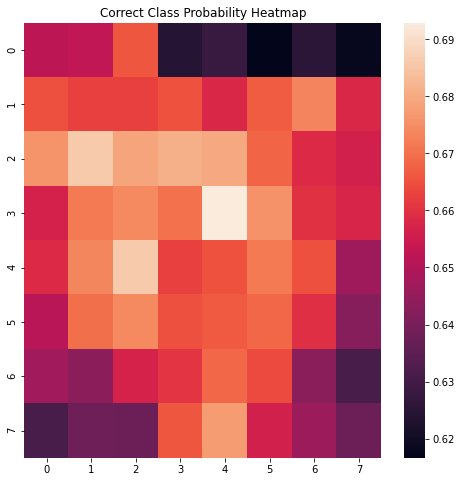

In [8]:
model_number = 3
overall = False
image_filename = 'overall' if overall else models[model_number] + '_heatmap.png'

plt.figure(figsize=(8, 8))

if overall:
    averaged_heatmap = np.reshape(np.mean(heatmaps, axis=0), newshape=(8,8))
    sns.heatmap(data=averaged_heatmap)
else:
    heatmap = np.reshape(heatmaps[model_number], newshape=(8,8))
    sns.heatmap(data=heatmap)

plt.title('Correct Class Probability Heatmap')
plt.show()

In [9]:
# Code for Saving Plot Image

plt.figure(figsize=(8, 8))
for model_number in [0,1,2,3]:
    for overall in [True, False]:
        image_filename = 'heatmap_' + ('overall' if overall else models[model_number]) + '.png'

        if overall:
            averaged_heatmap = np.reshape(np.mean(heatmaps, axis=0), newshape=(8,8))
            sns.heatmap(data=averaged_heatmap)
        else:
            heatmap = np.reshape(heatmaps[model_number], newshape=(8,8))
            sns.heatmap(data=heatmap)
        
        plt.title('Correct Class Probability Heatmap')
        plt.tight_layout()
        plt.savefig('Plots/' + image_filename, dpi=500)
        plt.clf()

<Figure size 576x576 with 0 Axes>

## Confusion Matrix

Normalized confusion matrix


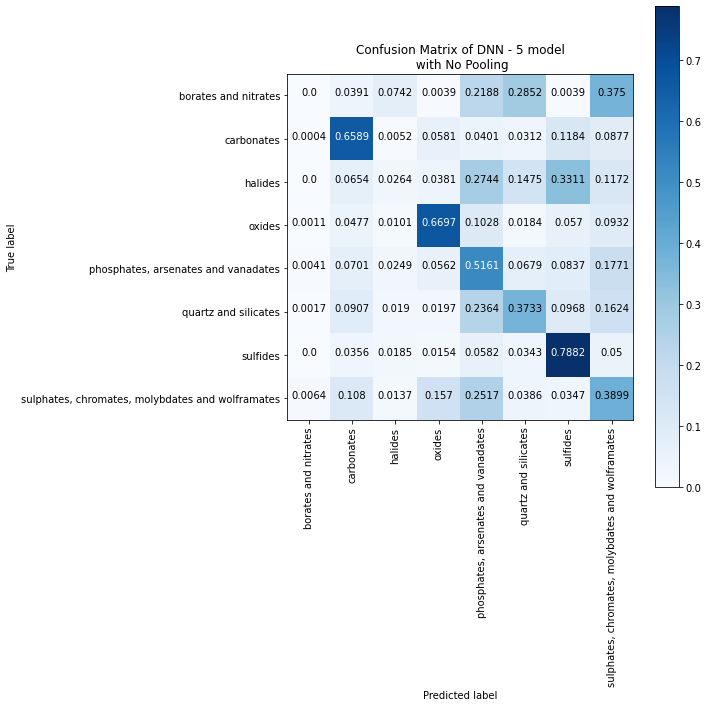

In [10]:
model_number = 3
input_data = 'shot'   # in ['MP', 'shot', 'central_grid']
mode = 'standard'

model_filename = models[model_number] + '_' + input_data + '_' + mode + '_cv.npy'

predictions_path = root_path + 'Predictions/' + model_filename


conf_matrix = utils.pred_to_conf_matrix(predictions_path, cv_len, n_classes=mineral_group_labels.size)

img_title = 'Confusion Matrix of ' + model_names[model_number] + ' model\n with ' + pooling_names[mode]
utils.plot_confusion_matrix(conf_matrix, mineral_group_labels,
                            normalize=True, fp_precision=4,
                            title=img_title)


In [11]:
# Code for Saving Plot Image
lista = [('average', 'MP'), ('max', 'MP'), ('dnn', 'MP'), ('dnn_split', 'MP'),
         ('standard', 'shot'), ('major_vote', 'shot')]

plt.figure(figsize=(10, 10))
for model_number in [0,1,2,3]:
    for mode, input_data in lista:
        model_filename = models[model_number] + '_' + input_data + '_' + mode + '_cv.npy'

        predictions_path = root_path + 'Predictions/' + model_filename


        cm = utils.pred_to_conf_matrix(predictions_path, cv_len, n_classes=mineral_group_labels.size)

        image_filename = 'confusion_matrix_' + model_filename[:-7] + '.png'
        img_savepath = 'Plots/' + image_filename
        img_title = 'Confusion Matrix of ' + model_names[model_number] + ' model\n with ' + pooling_names[mode]
        normalize = True
        fp_precision = 4
        classes = mineral_group_labels
        cmap = plt.cm.Blues
        
        if normalize:
            cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=fp_precision)

        cm_n = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.imshow(cm_n, interpolation='nearest', cmap=cmap)
        plt.title(img_title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        plt.savefig(img_savepath, bbox_inches='tight', dpi=500)
        plt.clf()

<Figure size 720x720 with 0 Axes>

## ROC Curve

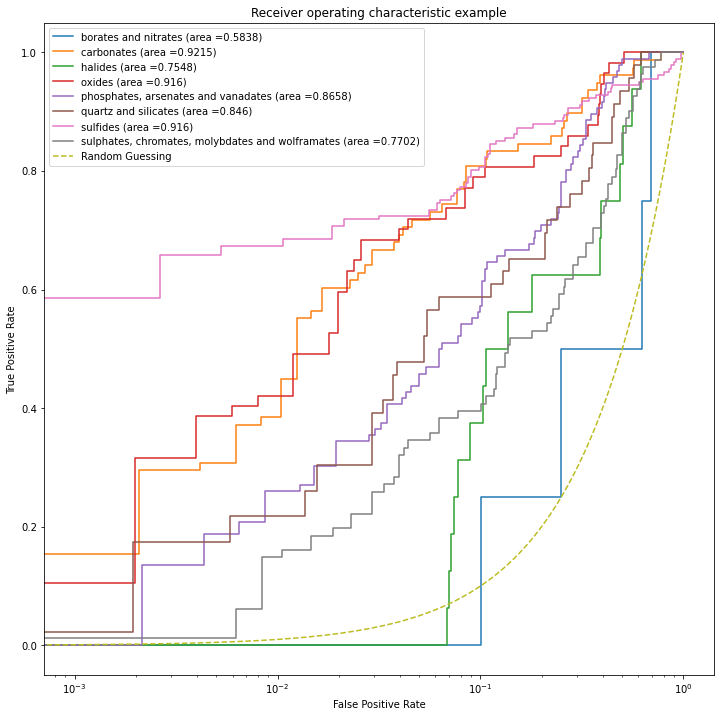

In [12]:
model_number = 3
input_data = 'MP'   # in ['MP', 'shot', 'central_grid']
mode = 'dnn_split'

model_filename = models[model_number] + '_' + input_data + '_' + mode + '_cv.npy'
predictions_path = root_path + 'Predictions/' + model_filename

preds, pred_labels = data_utils.load_and_unpack_preds(predictions_path, cv_len)

roc_curves = utils.pred_to_roc_curves(preds, pred_labels)


plt.figure(figsize=(12,12))
for i, roc_curve in enumerate(roc_curves):
    roc_auc = np.round(auc(roc_curve[0], roc_curve[1]), 4)
    plt.plot(roc_curve[0], roc_curve[1], label=mineral_group_labels[i] + ' (area ={})'.format(roc_auc))

plt.plot(np.arange(0,1,0.001), np.arange(0,1,0.001), linestyle='--', label='Random Guessing')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xscale('log')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="upper left")
plt.show()

In [13]:
# Code for Saving Plot Image
lista = [('average', 'MP'), ('max', 'MP'), ('dnn', 'MP'), ('dnn_split', 'MP'),
         ('standard', 'shot')]
plt.figure(figsize=(12,12))
for model_number in [0,1,2,3]:
    for mode, input_data in lista:
        model_filename = models[model_number] + '_' + input_data + '_' + mode + '_cv.npy'
        predictions_path = root_path + 'Predictions/' + model_filename
        
        image_filename = 'roc_curves_' + model_filename[:-7] + '.png'
        img_savepath = 'Plots/' + image_filename
        img_title = 'ROC curves of ' + model_names[model_number] + ' model\n with ' + pooling_names[mode]


        preds, pred_labels = data_utils.load_and_unpack_preds(predictions_path, cv_len)

        roc_curves = utils.pred_to_roc_curves(preds, pred_labels)

        
        for i, roc_curve in enumerate(roc_curves):
            roc_auc = np.round(auc(roc_curve[0], roc_curve[1]), 4)
            plt.plot(roc_curve[0], roc_curve[1], label=mineral_group_labels[i] + ' (area ={})'.format(roc_auc))

        plt.plot(np.arange(0,1,0.001), np.arange(0,1,0.001), linestyle='--', label='Random Guessing')
        plt.xscale('log')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="upper left")
        

        plt.savefig(img_savepath, bbox_inches='tight', dpi=500)
        plt.clf()

<Figure size 864x864 with 0 Axes>

## Pooling Layer Weights

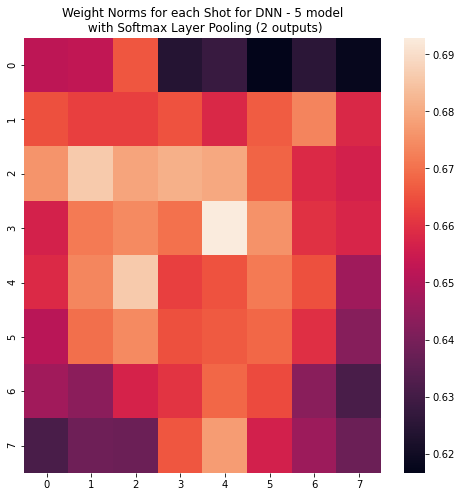

In [14]:
model_number = 3
input_data = 'MP'   # in ['MP', 'central_grid']
mode = 'dnn_split'

model_filename = models[model_number] + '_' + input_data + '_' + mode + '_cv.npy'
weights_path = root_path + 'Pooling Weights Norms/' + model_filename


weight_norms = np.load(weights_path)
assert weight_norms.shape == (cv_len, 64)
mean_norms = np.mean(weight_norms, axis=0)


plt.figure(figsize=(8,8))
img_title = 'Weight Norms for each Shot for ' + model_names[model_number] + ' model\n with ' + pooling_names[mode]
sns.heatmap(data=heatmap)
plt.title(img_title)
plt.show()

In [15]:
# Code for Saving Plot Image
input_data = 'MP'
mode = 'dnn_split'
plt.figure(figsize=(8,8))
for model_number in [0,1,2,3]:
    model_filename = models[model_number] + '_' + input_data + '_' + mode + '_cv.npy'

    image_filename = 'weight_norms_' + model_filename[:-7] + '.png'
    img_savepath = 'Plots/' + image_filename
    img_title = 'Weight Norms for each Shot for ' + model_names[model_number] + ' model\n with ' + pooling_names[mode]


    weights_path = root_path + 'Pooling Weights Norms/' + model_filename


    weight_norms = np.load(weights_path)
    assert weight_norms.shape == (cv_len, 64)
    mean_norms = np.mean(weight_norms, axis=0)

    sns.heatmap(data=heatmap)
    plt.title(img_title)

    plt.tight_layout()
    plt.savefig(img_savepath, bbox_inches='tight', dpi=500)
    plt.clf()

<Figure size 576x576 with 0 Axes>